In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=UserWarning) # FutureWarning 제거

bert=pd.read_csv('/opt/ml/input/DKT/code/saint+/ensemble/bert.csv')
cat=pd.read_csv('/opt/ml/input/DKT/code/saint+/ensemble/catb.csv')
lgbm=pd.read_csv('/opt/ml/input/DKT/code/saint+/ensemble/lightgbm.csv')
gcn=pd.read_csv('/opt/ml/input/DKT/code/saint+/ensemble/lightgcn.csv')
saint=pd.read_csv('/opt/ml/input/DKT/code/saint+/ensemble/saint.csv')
lstm=pd.read_csv('/opt/ml/input/DKT/code/saint+/ensemble/lstm.csv')
tab=pd.read_csv('/opt/ml/input/DKT/code/saint+/ensemble/tabnet_best.csv')

en=pd.read_csv('/opt/ml/input/DKT/code/saint+/ensemble/tabnet_best.csv')




In [6]:
en['prediction'] = (lgbm['prediction']+gcn['prediction']+tab['prediction']+lstm['prediction'])/4

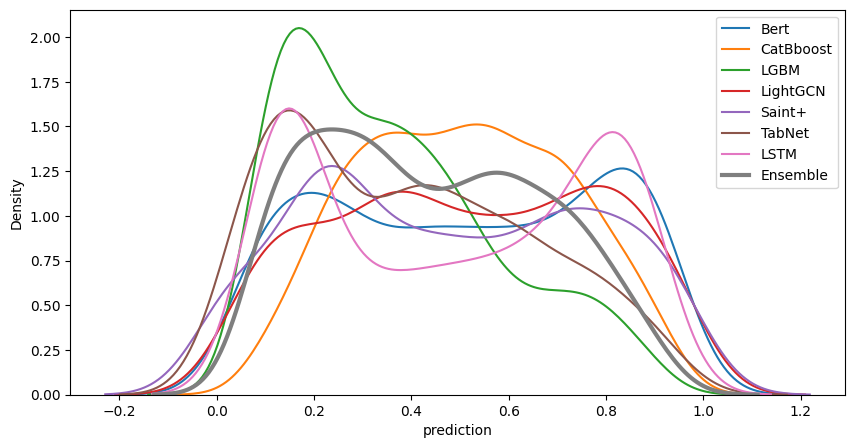

In [7]:
fig, axes = plt.subplots(1,1, figsize=(10,5))

sns.distplot(bert['prediction'], hist=False, label='Bert')
sns.distplot(cat['prediction'], hist=False, label='CatBboost')
sns.distplot(lgbm['prediction'], hist=False, label='LGBM')
sns.distplot(gcn['prediction'], hist=False, label = 'LightGCN')
sns.distplot(saint['prediction'], hist=False, label='Saint+')
sns.distplot(tab['prediction'], hist=False, label='TabNet')
sns.distplot(lstm['prediction'], hist=False, label='LSTM')
sns.distplot(en['prediction'], hist=False, label='Ensemble', kde_kws={'linewidth':3})

plt.legend()
plt.show()

In [8]:
en.to_csv('/opt/ml/input/DKT/code/saint+/sub/ens_4.csv')